In [1]:
from manim import *

Manim Community v0.17.2

In [2]:
config.media_width = "100%"
config.verbosity = "WARNING"
config.background_color = WHITE

In [3]:
%%manim -pqh PolygonAngle

def get_intersect(a1, a2, b1, b2):
    """
    Returns the point of intersection of the lines passing through a2,a1 and b2,b1.
    a1: [x, y] a point on the first line
    a2: [x, y] another point on the first line
    b1: [x, y] a point on the second line
    b2: [x, y] another point on the second line
    """
    s = np.vstack([a1[0:2],a2[0:2],b1[0:2],b2[0:2]])        # s for stacked
    h = np.hstack((s, np.ones((4, 1)))) # h for homogeneous
    l1 = np.cross(h[0], h[1])           # get first line
    l2 = np.cross(h[2], h[3])           # get second line
    x, y, z = np.cross(l1, l2)          # point of intersection
    if z == 0:                          # lines are parallel
        return (float('inf'), float('inf'))
    return np.array([x/z, y/z,0])

class PolygonAngle(Scene):
    def construct(self):
        
        number_plane = NumberPlane(
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 4,
                "stroke_opacity": 0.6
            }
        )
        pentagon = RegularPolygon(5, stroke_color=BLACK, stroke_width=6, fill_opacity = 0.1, color = TEAL).scale(3).set_z_index(2)
        #pentagon.shift(0.65*UP)
        
        # Select two pairs of vertices
        vertices = pentagon.get_vertices()
        pair1 = [vertices[0], vertices[2]]
        pair2 = [vertices[1], vertices[4]]
        
        # Create lines joining the selected vertices
        line1 = Line(pair1[0], pair1[1], color=BLACK, stroke_width=6).set_z_index(2)
        line2 = Line(pair2[0], pair2[1], color=BLACK, stroke_width=6).set_z_index(2)
        
        intersection = get_intersect(pair1[0], pair1[1], pair2[0], pair2[1] )
        
        #Add sector
        sector = Sector(arc_center=line2.get_start(), outer_radius=0.7, start_angle=line1.get_angle(), angle = PI/1.67, fill_opacity=1, fill_color=PURPLE_B, stroke_width = 2, stroke_color = BLACK)
        sector.rotate(PI)
        sector.move_to(intersection)
        sector.shift(0.24*LEFT+0.33*UP)
        
        #start solving
        pentagon_sector = sector.copy()
        pentagon_sector.align_to(pentagon, DR)
        pentagon_sector.align_to(vertices[3], RIGHT).shift(0.2*RIGHT)
        
        #opposite angle
        opposite_angle = sector.copy()
        opposite_angle.move_to(intersection)
        opposite_angle.shift(0.24*RIGHT+0.33*DOWN)
        opposite_angle.rotate(PI)
        
        #add everything
        self.play(FadeIn(number_plane))
        self.play(GrowFromCenter(pentagon, run_time=2))
        self.wait()
        self.play(Create(line1), Create(line2))
        self.play(FadeIn(sector, run_time = 2))
        self.wait(3)
        self.play(FadeIn(pentagon_sector))
        self.wait(2)
        self.play(FadeIn(opposite_angle))
        self.wait(2)

In [4]:
%%manim -pqh PolygonAngle
class PolygonAngle(Scene):
    def construct(self):
        square1 = Square(color = BLUE)
        self.play(square1.animate.shift(LEFT))
        
        square2 = Square(color = RED)
        self.play(Rotate(square2, PI),square2.animate.shift(LEFT))


In [5]:
%%manim -pql check_zoom

class check_zoom(MovingCameraScene):
    def construct(self):
        s=Square().set_color(GREEN)
        self.add(s)
        t=s.copy().shift(2*RIGHT+UP).rotate(PI/4)
        self.add(t)
        s.add_updater(lambda x,dt: x.rotate(dt/2*PI/4).shift(dt/2*(2*RIGHT+UP)))
        self.wait(2)
        s.suspend_updating()
        #self.remove(s)
        self.wait()

In [6]:
%%manim -pql check_move2
class check_move2(MovingCameraScene):
    def construct(self):
        A = Dot(2*LEFT)
        B = Dot(2*LEFT+2*UP)
        C = Dot(2*RIGHT)
        t = Polygon(A.get_center(),B.get_center(),C.get_center())
        t.add_updater(lambda x: x.become(Polygon(A.get_center(),B.get_center(),C.get_center())))
        self.add(A,B,C,t)
        B.add_updater(lambda x,dt: x.shift(2*dt*RIGHT))
        self.wait(2)

In [7]:
%%manim -pql check_circs
config.background_color = WHITE
class check_circs(Scene):
    def construct(self):
        c=Circle(color=YELLOW).shift(3*UP).set_fill(YELLOW,opacity=1)
        d=2
        h=np.sqrt(3)/2*(2+d)-2
        row2 = VGroup(*[c.copy() for _ in range(2)]).arrange(RIGHT,buff=d).next_to(c,DOWN,buff=h)
        row3 = VGroup(*[c.copy() for _ in range(3)]).arrange(RIGHT,buff=d).next_to(row2,DOWN,buff=h)
        all_circles = VGroup(*c,*row2,*row3)
        self.play(Create(all_circles[0])) #creates first row
        self.wait(2)
        self.play(Create(all_circles[1:(1+2)])) #creates first row
        self.wait(2)

In [8]:
%%manim -pql check_gen
class check_gen(Scene):
    def construct(self):
        c=Circle()
        s=Square()
        self.add(c)
        A = AnimationGroup(
            AnimationGroup(s.animate.shift(4*RIGHT),run_time=4),
            AnimationGroup(AnimationGroup(Animation(Mobject()),run_time=2),AnimationGroup(c.animate.shift(4*RIGHT),run_time=2),lag_ratio=1)
        )
        t = ValueTracker(0)
        #self.add(t)
        def my_updater(mobj,dt,par):
            return mobj.become(c.copy().scale(1+dt/par).shift(par*dt*RIGHT))
        c.add_updater(lambda x,dt: my_updater(x,dt,3))
        #self.wait()
        #self.play(t.animate.set_value(0.5),run_time=1)
        #c.stop_updating()
        self.wait()
        c.suspend_updating()
        self.wait()
        c.resume_updating()
        self.wait()
        c.suspend_updating()
        self.wait()

In [9]:
%%manim -pqh PolygonAngle

def get_intersect(a1, a2, b1, b2):
    """
    Returns the point of intersection of the lines passing through a2,a1 and b2,b1.
    a1: [x, y] a point on the first line
    a2: [x, y] another point on the first line
    b1: [x, y] a point on the second line
    b2: [x, y] another point on the second line
    """
    s = np.vstack([a1[0:2],a2[0:2],b1[0:2],b2[0:2]])        # s for stacked
    h = np.hstack((s, np.ones((4, 1)))) # h for homogeneous
    l1 = np.cross(h[0], h[1])           # get first line
    l2 = np.cross(h[2], h[3])           # get second line
    x, y, z = np.cross(l1, l2)          # point of intersection
    if z == 0:                          # lines are parallel
        return (float('inf'), float('inf'))
    return np.array([x/z, y/z,0])

class PolygonAngle(Scene):
    def construct(self):
        
        number_plane = NumberPlane(
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 4,
                "stroke_opacity": 0.6
            }
        )
        pentagon = RegularPolygon(5, stroke_color=BLACK, stroke_width=6, fill_opacity = 0.1, color = TEAL).scale(3).set_z_index(2)
        #pentagon.shift(0.65*UP)
        
        # Select two pairs of vertices
        vertices = pentagon.get_vertices()
        pair1 = [vertices[0], vertices[2]]
        pair2 = [vertices[1], vertices[4]]
        
        # Create lines joining the selected vertices
        line1 = Line(pair1[0], pair1[1], color=BLACK, stroke_width=6).set_z_index(2)
        line2 = Line(pair2[0], pair2[1], color=BLACK, stroke_width=6).set_z_index(2)
        
        intersection = get_intersect(pair1[0], pair1[1], pair2[0], pair2[1] )
        
        #Add sector
        sector = Sector(arc_center=line2.get_start(), outer_radius=0.7, start_angle=line1.get_angle(), angle = PI/1.67, fill_opacity=1, fill_color=PURPLE_B, stroke_width = 2, stroke_color = BLACK)
        sector.rotate(PI)
        sector.move_to(intersection)
        sector.shift(0.24*LEFT+0.33*UP)
        
        #start solving
        pentagon_sector = sector.copy()
        pentagon_sector.align_to(pentagon, DR)
        pentagon_sector.align_to(vertices[3], RIGHT).shift(0.2*RIGHT)
        
        #opposite angle
        opposite_angle = sector.copy()
        opposite_angle.move_to(intersection)
        opposite_angle.shift(0.24*RIGHT+0.33*DOWN)
        opposite_angle.rotate(PI)
        
        #add everything
        self.play(FadeIn(number_plane))
        self.play(GrowFromCenter(pentagon, run_time=2))
        self.wait()
        self.play(Create(line1), Create(line2))
        self.play(FadeIn(sector, run_time = 2))
        self.wait(3)
        self.play(FadeIn(pentagon_sector))
        self.wait()       
        self.play(FadeIn(opposite_angle))
        self.wait()
        
        #final_position = opposite_angle.get_center()
        #self.play(Transform(pentagon_sector, pentagon_sector.move_to(final_position)), Rotate(pentagon_sector, angle = PI), run_time=3)
        #self.play(pentagon_sector.animate.rotate(PI).move_to(opposite_angle.get_center()))       
        #pentagon_sector.generate_target()
        #pentagon_sector.target.move_to(intersection)
        #pentagon_sector.target.shift(0.24*RIGHT+0.33*DOWN)
        #pentagon_sector.target.rotate(PI)
        #self.wait(2)
        #self.play(MoveToTarget(pentagon_sector))
        #self.wait(2)

In [10]:
%%manim -pql MoveToTargetExample
from manim import *

class MoveToTargetExample(Scene):
    def construct(self):
        c = Square(color =RED)

        c.generate_target()
        c.target.set_fill(color=GREEN, opacity=0.5)
        c.target.shift(2*RIGHT + UP).scale(0.5)
        c.target.rotate(PI/3)

        self.add(c)
        self.wait(2)
        self.play(MoveToTarget(c))

In [11]:
%%manim -pqh PolygonAngle
import math
config.background_color = WHITE
def get_intersect(a1, a2, b1, b2):
    """
    Returns the point of intersection of the lines passing through a2,a1 and b2,b1.
    a1: [x, y] a point on the first line
    a2: [x, y] another point on the first line
    b1: [x, y] a point on the second line
    b2: [x, y] another point on the second line
    """
    s = np.vstack([a1[0:2],a2[0:2],b1[0:2],b2[0:2]])        # s for stacked
    h = np.hstack((s, np.ones((4, 1)))) # h for homogeneous
    l1 = np.cross(h[0], h[1])           # get first line
    l2 = np.cross(h[2], h[3])           # get second line
    x, y, z = np.cross(l1, l2)          # point of intersection
    if z == 0:                          # lines are parallel
        return (float('inf'), float('inf'))
    return np.array([x/z, y/z,0])

class PolygonAngle(Scene):
    def construct(self):
        
        
        pentagon = RegularPolygon(n=5, stroke_color=BLACK, stroke_width=6, fill_opacity = 0.1, color = TEAL).scale(3)
        pentagon_edges = VGroup(*[Line(pentagon.get_vertices()[i], pentagon.get_vertices()[(i+1)%5], color=BLACK, stroke_width=6) for i in range(5)]).set_z_index(4)
        pentagon.joint_type=LineJointType.ROUND 
        pentagon_edges.joint_type=LineJointType.ROUND 
        
        # Select two pairs of vertices
        vertices = pentagon.get_vertices()
        pair1 = [vertices[0], vertices[2]]
        pair2 = [vertices[1], vertices[4]]
        
        
        
        # Create lines joining the selected vertices
        line1 = Line(pair1[0], pair1[1], color=BLACK, stroke_width=6).set_z_index(2)
        line2 = Line(pair2[0], pair2[1], color=BLACK, stroke_width=6).set_z_index(2)
        line1.joint_type=LineJointType.ROUND 
        line2.joint_type=LineJointType.ROUND 
        
        intersection = get_intersect(pair1[0], pair1[1], pair2[0], pair2[1] )
        
        #Add dots
        dot1 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_start()).set_z_index(5)
        dot2 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_end()).set_z_index(5)
        dot3 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line2.get_start()).set_z_index(5)
        dot4 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line2.get_end()).set_z_index(5)
        
        
        #Add symbols for equality of the sides of the pentagon
        parallel_symbol_p1 = Arrow(max_tip_length_to_length_ratio=0, color = BLACK)
        parallel_symbol_p2 = Arrow(max_tip_length_to_length_ratio=0, color = BLACK).next_to(parallel_symbol_p1, DOWN, buff = 0.7)
        parallel_symbol1 = VGroup(parallel_symbol_p1, parallel_symbol_p2).move_to(pentagon_edges[0].get_center()).rotate(math.atan(3/4)+PI/2).scale(0.2)       
        parallel_symbol2 = parallel_symbol1.copy().move_to(pentagon_edges[1].get_center()).rotate(-PI/1.67)
        parallel_symbol3 = parallel_symbol1.copy().move_to(pentagon_edges[2].get_center()).rotate(-2*PI/1.67)
        parallel_symbol4 = parallel_symbol1.copy().move_to(pentagon_edges[3].get_center()).rotate(2*PI/1.67)
        parallel_symbol5 = parallel_symbol1.copy().move_to(pentagon_edges[4].get_center()).rotate(PI/1.67)
        
        #Add arrows
        arrow1 = Arrow(max_stroke_width_to_length_ratio=0, color = BLACK).move_to(pentagon_edges[2].get_center()).shift(0.5*LEFT)
        arrow2 = Arrow(max_stroke_width_to_length_ratio=0, color = BLACK).move_to(line2.get_center()).shift(0.5*LEFT)
        arrow3 = Arrow(max_stroke_width_to_length_ratio=0, color = BLACK).move_to(pentagon_edges[3].get_center()).rotate(PI/2.5).shift(0.5*DOWN+0.165*LEFT)
        arrow4 = Arrow(max_stroke_width_to_length_ratio=0, color = BLACK).move_to(line1.get_center()).rotate(PI/2.5).shift(0.5*DOWN+0.165*LEFT)
        
        # Create a parallelogram
        parallelogram = Polygon(pair1[1], intersection, pair2[1], pentagon.get_vertices()[3], color=BLACK, stroke_width=6)
        
        #Intersecting lines
        intersecting_line1 = line1.copy()
        intersecting_line2 = line2.copy()
        
        # Add sector
        sector = Sector(arc_center=line2.get_start(), outer_radius=0.7, start_angle=line1.get_angle(), angle = PI/1.67, fill_opacity=1, fill_color=PURPLE_B, stroke_width = 2, stroke_color = BLACK)
        sector.rotate(PI)
        sector.move_to(intersection)
        sector.shift(0.24*LEFT+0.33*UP)
        
        # Start solving
        
        #pentagon sector
        pentagon_sector = sector.copy()
        pentagon_sector.align_to(pentagon, DR)
        pentagon_sector.align_to(vertices[3], RIGHT).shift(0.2*RIGHT)
        
        
        #create pentagon degree text
        # Add text of 108 degrees beside pentagon_sector
        pentagon_degree = MathTex("108^\\circ", color = BLACK).next_to(pentagon_sector, RIGHT, buff=SMALL_BUFF).scale(0.7).shift(0.1*LEFT)
        
        
        # Opposite angle
        opposite_angle = sector.copy()
        opposite_angle.move_to(intersection)
        opposite_angle.shift(0.24*RIGHT+0.33*DOWN)
        opposite_angle.rotate(PI)
        
        
        #add everything
        #self.play(FadeIn(number_plane))
        self.play(GrowFromCenter(pentagon, run_time=2))
        self.wait()
        self.play(FadeIn(dot1, dot2))
        self.wait()
        self.play(FadeIn(dot3, dot4))
        self.wait()
        self.play(Create(line1), Create(line2))
        self.play(FadeIn(sector, run_time = 2))
        self.wait(3)       
        self.play(FadeOut(sector))
        self.wait()
        
        self.play(Indicate(pentagon_edges, scale_factor = 1, color = YELLOW, run_time = 2))
        self.wait()
        
        #add equal symbols to the scene       
        self.play(FadeIn(parallel_symbol1, parallel_symbol2, parallel_symbol3, parallel_symbol4, parallel_symbol5))
        self.wait(2)
        
        self.play(FadeOut(parallel_symbol1, parallel_symbol2, parallel_symbol3, parallel_symbol4, parallel_symbol5))
        self.wait(2)
        
        self.play(Indicate(line2), Indicate(pentagon_edges[2]), scale_factor = 1, color = PURE_RED, run_time=1.5)
        self.play(FadeIn(arrow1), FadeIn(arrow2))
        self.wait()
        self.play(Indicate(line1), Indicate(pentagon_edges[3]), scale_factor = 1, color = PURE_RED, run_time=1.5)
        self.play(FadeIn(arrow3), FadeIn(arrow4))
        self.wait()
        self.play(FadeOut(arrow1, arrow2, arrow3, arrow4), FadeIn(parallelogram))
        self.wait(2)
        
        self.play(Indicate(parallelogram), run_time = 3)
        
        self.play(FadeIn(pentagon_sector), FadeIn(pentagon_degree))
        self.wait()
        
        pentagon_sector_copy = pentagon_sector.copy()
        
        self.play(pentagon_sector_copy.animate.rotate(PI).move_to(opposite_angle.get_center()))    
        self.wait()
        
        self.play(ShowPassingFlash(intersecting_line1.set_color(YELLOW), time_width=0.5), ShowPassingFlash(intersecting_line2.set_color(YELLOW), time_width=0.5), run_time=1, rate_func=linear)
        self.wait()
        self.play(opposite_angle.animate.rotate(PI).move_to(sector.get_center()))    
        self.wait()
        
        sector_copy = sector.copy()
        self.play(Indicate(sector), color = None)
        self.wait()
        self.play(sector_copy.animate.next_to(pentagon, RIGHT, buff=0.6).scale(1), FadeOut(pentagon_degree))
        
        answer = MathTex(" = 108^\\circ").scale(0.8).set_color(BLACK).set_stroke(width = 1).next_to(sector_copy, RIGHT)
        answer.next_to(sector_copy, RIGHT, buff=0.3)
        
        self.play(FadeIn(answer))
        self.wait()

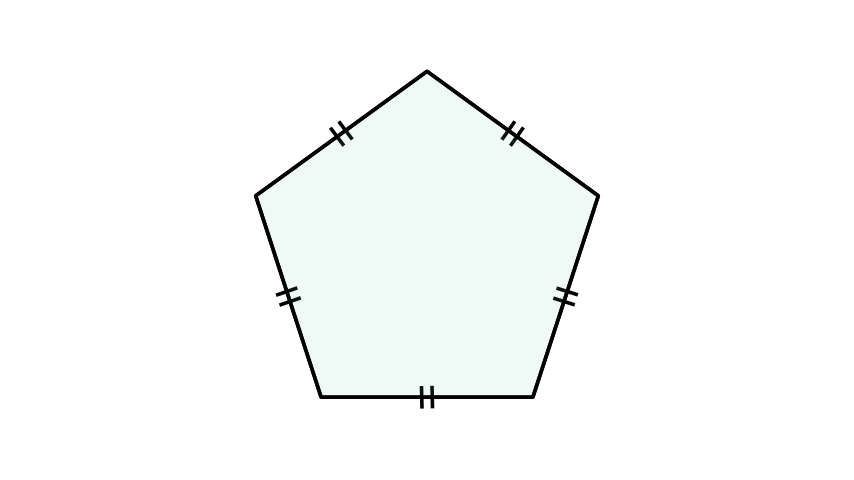

In [12]:
%%manim -pql ArrowExample
config.background_color = WHITE
from manim import *

class ArrowExample(Scene):
    def construct(self):
        pentagon = RegularPolygon(n=5, stroke_color=BLACK, stroke_width=6, fill_opacity = 0.1, color = TEAL).scale(3).set_z_index(2)
        pentagon_edges = VGroup(*[Line(pentagon.get_vertices()[i], pentagon.get_vertices()[(i+1)%5], color=BLACK, stroke_width=6) for i in range(5)]).set_z_index(4)
        pentagon.joint_type=LineJointType.ROUND 
        pentagon_edges.joint_type=LineJointType.ROUND 
        
        #Add symbols for equality of the sides of the pentagon
        parallel_symbol_p1 = Arrow(max_tip_length_to_length_ratio=0, color = BLACK)
        parallel_symbol_p2 = Arrow(max_tip_length_to_length_ratio=0, color = BLACK).next_to(parallel_symbol_p1, DOWN, buff = 0.7)
        parallel_symbol1 = VGroup(parallel_symbol_p1, parallel_symbol_p2).move_to(pentagon_edges[0].get_center()).rotate(math.atan(3/4)+PI/2).scale(0.25)       
        parallel_symbol2 = parallel_symbol1.copy().move_to(pentagon_edges[1].get_center()).rotate(-PI/1.67)
        parallel_symbol3 = parallel_symbol1.copy().move_to(pentagon_edges[2].get_center()).rotate(-2*PI/1.67)
        parallel_symbol4 = parallel_symbol1.copy().move_to(pentagon_edges[3].get_center()).rotate(2*PI/1.67)
        parallel_symbol5 = parallel_symbol1.copy().move_to(pentagon_edges[4].get_center()).rotate(PI/1.67)
        
        # Select two pairs of vertices
        vertices = pentagon.get_vertices()
        pair1 = [vertices[0], vertices[2]]
        pair2 = [vertices[1], vertices[4]]
        
        # Create lines joining the selected vertices
        line1 = Line(pair1[0], pair1[1], color=BLACK, stroke_width=6).set_z_index(2)
        line2 = Line(pair2[0], pair2[1], color=BLACK, stroke_width=6).set_z_index(2)
        line1.joint_type=LineJointType.ROUND 
        line2.joint_type=LineJointType.ROUND 
        
        #add everything to the scene       
        self.add(parallel_symbol1, parallel_symbol2, pentagon, pentagon_edges, parallel_symbol3, parallel_symbol4, parallel_symbol5)

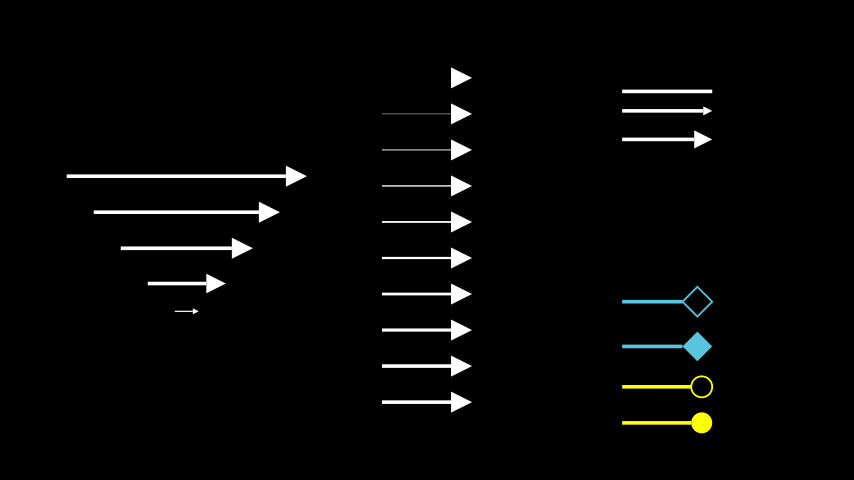

In [13]:
%%manim -pql ArrowExample
config.background_color = BLACK
from manim import *
class ArrowExample(Scene):
    def construct(self):
        left_group = VGroup()
        # As buff increases, the size of the arrow decreases.
        for buff in np.arange(0, 2.2, 0.45):
            left_group += Arrow(buff=buff, start=2 * LEFT, end=2 * RIGHT)
        # Required to arrange arrows.
        left_group.arrange(DOWN)
        left_group.move_to(4 * LEFT)
        middle_group = VGroup()
        # As max_stroke_width_to_length_ratio gets bigger,
        # the width of stroke increases.
        for i in np.arange(0, 5, 0.5):
            middle_group += Arrow(max_stroke_width_to_length_ratio=i)
        middle_group.arrange(DOWN)
        UR_group = VGroup()
        # As max_tip_length_to_length_ratio increases,
        # the length of the tip increases.
        for i in np.arange(0, 0.3, 0.1):
            UR_group += Arrow(max_tip_length_to_length_ratio=i)
        UR_group.arrange(DOWN)
        UR_group.move_to(4 * RIGHT + 2 * UP)
        DR_group = VGroup()
        DR_group += Arrow(start=LEFT, end=RIGHT, color=BLUE, tip_shape=ArrowSquareTip)
        DR_group += Arrow(start=LEFT, end=RIGHT, color=BLUE, tip_shape=ArrowSquareFilledTip)
        DR_group += Arrow(start=LEFT, end=RIGHT, color=YELLOW, tip_shape=ArrowCircleTip)
        DR_group += Arrow(start=LEFT, end=RIGHT, color=YELLOW, tip_shape=ArrowCircleFilledTip)
        DR_group.arrange(DOWN)
        DR_group.move_to(4 * RIGHT + 2 * DOWN)
        self.add(left_group, middle_group, UR_group, DR_group)

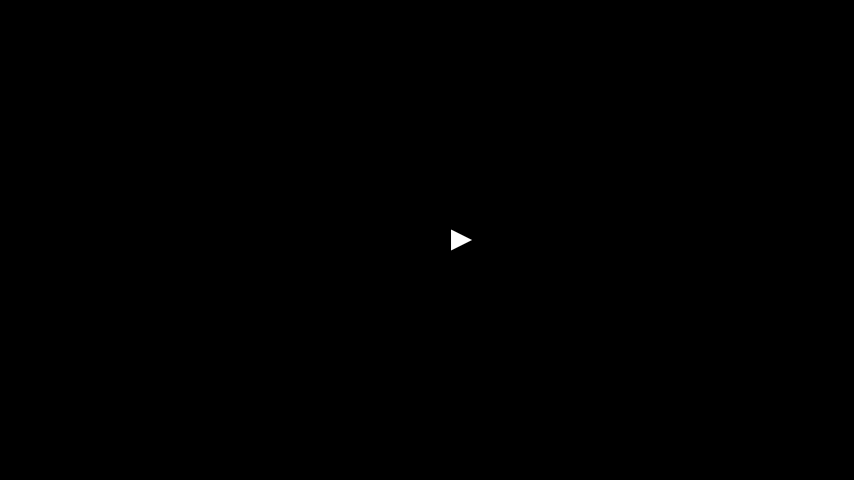

In [14]:
%%manim -pql ArrowExample
config.background_color = BLACK
from manim import *
class ArrowExample(Scene):
    def construct(self):
        arrow = Arrow(max_stroke_width_to_length_ratio=0)
        self.add(arrow)

In [15]:
%%manim -pqh PolygonAngle1
import math
config.background_color = WHITE
def get_intersect(a1, a2, b1, b2):
    """
    Returns the point of intersection of the lines passing through a2,a1 and b2,b1.
    a1: [x, y] a point on the first line
    a2: [x, y] another point on the first line
    b1: [x, y] a point on the second line
    b2: [x, y] another point on the second line
    """
    s = np.vstack([a1[0:2],a2[0:2],b1[0:2],b2[0:2]])        # s for stacked
    h = np.hstack((s, np.ones((4, 1)))) # h for homogeneous
    l1 = np.cross(h[0], h[1])           # get first line
    l2 = np.cross(h[2], h[3])           # get second line
    x, y, z = np.cross(l1, l2)          # point of intersection
    if z == 0:                          # lines are parallel
        return (float('inf'), float('inf'))
    return np.array([x/z, y/z,0])

class PolygonAngle1(Scene):
    def construct(self):
        
        pentagon = RegularPolygon(n=5, stroke_color=BLACK, stroke_width=6, fill_opacity = 0.1, color = TEAL).scale(3)
        pentagon_edges = VGroup(*[Line(pentagon.get_vertices()[i], pentagon.get_vertices()[(i+1)%5], color=BLACK, stroke_width=6) for i in range(5)]).set_z_index(4)
        pentagon.joint_type=LineJointType.ROUND 
        pentagon_edges.joint_type=LineJointType.ROUND 
        
        # Select two pairs of vertices
        vertices = pentagon.get_vertices()
        pair1 = [vertices[0], vertices[2]]
        pair2 = [vertices[1], vertices[4]]
        
        # Create lines joining the selected vertices
        line1 = Line(pair1[0], pair1[1], color=BLACK, stroke_width=6).set_z_index(2)
        line2 = Line(pair2[0], pair2[1], color=BLACK, stroke_width=6).set_z_index(2)
        line1.joint_type=LineJointType.ROUND 
        line2.joint_type=LineJointType.ROUND 
        
        intersection = get_intersect(pair1[0], pair1[1], pair2[0], pair2[1] )
        
         # Add sector
        sector = Sector(arc_center=line2.get_start(), outer_radius=0.7, start_angle=line1.get_angle(), angle = PI/1.67, fill_opacity=1, fill_color=PURPLE_B, stroke_width = 2, stroke_color = BLACK)
        sector.rotate(PI)
        sector.move_to(intersection)
        sector.shift(0.24*LEFT+0.33*UP)
        
        
        # Create a parallelogram
        parallelogram = Polygon(pair1[1], intersection, pair2[1], pentagon.get_vertices()[3], color = BLACK)
        
        #pentagon sector
        pentagon_sector = sector.copy()
        pentagon_sector.align_to(pentagon, DR)
        pentagon_sector.align_to(vertices[3], RIGHT).shift(0.2*RIGHT)
        
        
        #add everything
        self.play(GrowFromCenter(pentagon, run_time=2))
        self.wait()
        self.play(Create(line1), Create(line2))
        self.wait()
        self.play(Indicate(parallelogram))
        self.wait()
        
        self.play(FadeIn(pentagon_sector))
        self.wait()

In [16]:
%%manim -pqh PolygonAngle2
import math
config.background_color = WHITE
def get_intersect(a1, a2, b1, b2):
    """
    Returns the point of intersection of the lines passing through a2,a1 and b2,b1.
    a1: [x, y] a point on the first line
    a2: [x, y] another point on the first line
    b1: [x, y] a point on the second line
    b2: [x, y] another point on the second line
    """
    s = np.vstack([a1[0:2],a2[0:2],b1[0:2],b2[0:2]])        # s for stacked
    h = np.hstack((s, np.ones((4, 1)))) # h for homogeneous
    l1 = np.cross(h[0], h[1])           # get first line
    l2 = np.cross(h[2], h[3])           # get second line
    x, y, z = np.cross(l1, l2)          # point of intersection
    if z == 0:                          # lines are parallel
        return (float('inf'), float('inf'))
    return np.array([x/z, y/z,0])


class PolygonAngle2(Scene):
    def construct(self):
        
        pentagon = RegularPolygon(n=5, stroke_color=BLACK, stroke_width=6, fill_opacity = 0.1, color = TEAL).scale(3)
        pentagon_edges = VGroup(*[Line(pentagon.get_vertices()[i], pentagon.get_vertices()[(i+1)%5], color=BLACK, stroke_width=6) for i in range(5)]).set_z_index(4)
        pentagon.joint_type=LineJointType.ROUND 
        pentagon_edges.joint_type=LineJointType.ROUND 
        
        # Select two pairs of vertices
        vertices = pentagon.get_vertices()
        pair1 = [vertices[0], vertices[2]]
        pair2 = [vertices[1], vertices[4]]
        
        # Create lines joining the selected vertices
        line1 = Line(pair1[0], pair1[1], color=BLACK, stroke_width=6).set_z_index(2)
        line2 = Line(pair2[0], pair2[1], color=BLACK, stroke_width=6).set_z_index(2)
        line1.joint_type=LineJointType.ROUND 
        line2.joint_type=LineJointType.ROUND 
        
        intersection = get_intersect(pair1[0], pair1[1], pair2[0], pair2[1] )
        
       
        # Create a parallelogram
        parallelogram = Polygon(pair1[1], intersection, pair2[1], pentagon.get_vertices()[3], fill_opacity=0.2, fill_color=YELLOW).set_z_index(2)
        
        # Add everything
        self.play(GrowFromCenter(pentagon, run_time=2))
        self.wait()
        self.play(Create(line1), Create(line2))
        self.wait()
        self.play(Indicate(parallelogram))
        self.wait()
        

In [17]:
%%manim -pqh PolygonAngleDark
import math
config.background_color = BLACK
def get_intersect(a1, a2, b1, b2):
    """
    Returns the point of intersection of the lines passing through a2,a1 and b2,b1.
    a1: [x, y] a point on the first line
    a2: [x, y] another point on the first line
    b1: [x, y] a point on the second line
    b2: [x, y] another point on the second line
    """
    s = np.vstack([a1[0:2],a2[0:2],b1[0:2],b2[0:2]])        # s for stacked
    h = np.hstack((s, np.ones((4, 1)))) # h for homogeneous
    l1 = np.cross(h[0], h[1])           # get first line
    l2 = np.cross(h[2], h[3])           # get second line
    x, y, z = np.cross(l1, l2)          # point of intersection
    if z == 0:                          # lines are parallel
        return (float('inf'), float('inf'))
    return np.array([x/z, y/z,0])

class PolygonAngleDark(Scene):
    def construct(self):
        
        
        pentagon = RegularPolygon(n=5, stroke_color=WHITE, stroke_width=6, fill_opacity = 1, color = TEAL_D).scale(3)
        pentagon_edges = VGroup(*[Line(pentagon.get_vertices()[i], pentagon.get_vertices()[(i+1)%5], color=WHITE, stroke_width=6) for i in range(5)]).set_z_index(4)
        pentagon.joint_type=LineJointType.ROUND 
        pentagon_edges.joint_type=LineJointType.ROUND 
        
        # Select two pairs of vertices
        vertices = pentagon.get_vertices()
        pair1 = [vertices[0], vertices[2]]
        pair2 = [vertices[1], vertices[4]]
        
        
        
        # Create lines joining the selected vertices
        line1 = Line(pair1[0], pair1[1], color=WHITE, stroke_width=6).set_z_index(2)
        line2 = Line(pair2[0], pair2[1], color=WHITE, stroke_width=6).set_z_index(2)
        line1.joint_type=LineJointType.ROUND 
        line2.joint_type=LineJointType.ROUND 
        
        intersection = get_intersect(pair1[0], pair1[1], pair2[0], pair2[1] )
        
        #Add dots
        dot1 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(line1.get_start()).set_z_index(5)
        dot2 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(line1.get_end()).set_z_index(5)
        dot3 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(line2.get_start()).set_z_index(5)
        dot4 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(line2.get_end()).set_z_index(5)
        
        
        #Add symbols for equality of the sides of the pentagon
        parallel_symbol_p1 = Arrow(max_tip_length_to_length_ratio=0, color = WHITE)
        parallel_symbol_p2 = Arrow(max_tip_length_to_length_ratio=0, color = WHITE).next_to(parallel_symbol_p1, DOWN, buff = 0.7)
        parallel_symbol1 = VGroup(parallel_symbol_p1, parallel_symbol_p2).move_to(pentagon_edges[0].get_center()).rotate(math.atan(3/4)+PI/2).scale(0.2)       
        parallel_symbol2 = parallel_symbol1.copy().move_to(pentagon_edges[1].get_center()).rotate(-PI/1.67)
        parallel_symbol3 = parallel_symbol1.copy().move_to(pentagon_edges[2].get_center()).rotate(-2*PI/1.67)
        parallel_symbol4 = parallel_symbol1.copy().move_to(pentagon_edges[3].get_center()).rotate(2*PI/1.67)
        parallel_symbol5 = parallel_symbol1.copy().move_to(pentagon_edges[4].get_center()).rotate(PI/1.67)
        
        #Add arrows
        arrow1 = Arrow(max_stroke_width_to_length_ratio=0, color = WHITE).move_to(pentagon_edges[2].get_center()).shift(0.5*LEFT)
        arrow2 = Arrow(max_stroke_width_to_length_ratio=0, color = WHITE).move_to(line2.get_center()).shift(0.5*LEFT)
        arrow3 = Arrow(max_stroke_width_to_length_ratio=0, color = WHITE).move_to(pentagon_edges[3].get_center()).rotate(PI/2.5).shift(0.5*DOWN+0.165*LEFT)
        arrow4 = Arrow(max_stroke_width_to_length_ratio=0, color = WHITE).move_to(line1.get_center()).rotate(PI/2.5).shift(0.5*DOWN+0.165*LEFT)
        
        # Create a parallelogram
        parallelogram = Polygon(pair1[1], intersection, pair2[1], pentagon.get_vertices()[3], color=WHITE, stroke_width=6, fill_opacity = 0)
        
        #Intersecting lines
        intersecting_line1 = line1.copy()
        intersecting_line2 = line2.copy()
        
        # Add sector
        sector = Sector(arc_center=line2.get_start(), outer_radius=0.7, start_angle=line1.get_angle(), angle = PI/1.67, fill_opacity=1, fill_color=RED, stroke_width = 2, stroke_color = WHITE)
        sector.rotate(PI)
        sector.move_to(intersection)
        sector.shift(0.24*LEFT+0.33*UP)
        
        # Start solving
        
        #pentagon sector
        pentagon_sector = sector.copy()
        pentagon_sector.align_to(pentagon, DR)
        pentagon_sector.align_to(vertices[3], RIGHT).shift(0.2*RIGHT)
        
        
        #create pentagon degree text
        # Add text of 108 degrees beside pentagon_sector
        pentagon_degree = MathTex("108^\\circ", color = WHITE).next_to(pentagon_sector, RIGHT, buff=SMALL_BUFF).scale(0.7).shift(0.1*LEFT)
        
        
        # Opposite angle
        opposite_angle = sector.copy()
        opposite_angle.move_to(intersection)
        opposite_angle.shift(0.24*RIGHT+0.33*DOWN)
        opposite_angle.rotate(PI)
        
        
        #add everything
        #self.play(FadeIn(number_plane))
        self.play(GrowFromCenter(pentagon, run_time=2))
        self.wait()
        self.play(FadeIn(dot1, dot2))
        self.wait()
        self.play(FadeIn(dot3, dot4))
        self.wait()
        self.play(Create(line1))
        self.play(Create(line2))
        self.wait()
        question = MathTex("?").scale(0.6).set_color(WHITE).set_stroke(width = 1).move_to(sector.get_center()).set_z_index(6)
        self.play(FadeIn(sector, run_time = 2), FadeIn(question, run_time = 2))
        self.wait(3)       
        self.play(FadeOut(sector), FadeOut(question))
        self.wait()
        
        self.play(Indicate(pentagon_edges, scale_factor = 1, color = YELLOW, run_time = 2))
        self.wait()
        
        #add equal symbols to the scene       
        self.play(FadeIn(parallel_symbol1, parallel_symbol2, parallel_symbol3, parallel_symbol4, parallel_symbol5))
        self.wait(2)
        
        self.play(FadeOut(parallel_symbol1, parallel_symbol2, parallel_symbol3, parallel_symbol4, parallel_symbol5))
        self.wait(2)
        
        self.play(Indicate(line2), Indicate(pentagon_edges[2]), scale_factor = 1, color = PURE_RED, run_time=1.5)
        self.play(FadeIn(arrow1), FadeIn(arrow2))
        self.wait()
        self.play(Indicate(line1), Indicate(pentagon_edges[3]), scale_factor = 1, color = PURE_RED, run_time=1.5)
        self.play(FadeIn(arrow3), FadeIn(arrow4))
        self.wait()
        self.play(FadeOut(arrow1, arrow2, arrow3, arrow4), FadeIn(parallelogram))
        self.wait(2)
        
        self.play(Indicate(parallelogram), run_time = 3)
        
        self.play(FadeIn(pentagon_sector), FadeIn(pentagon_degree))
        self.wait()
        
        self.play(Indicate(parallelogram), run_time = 2, color = YELLOW, scale_factor = 1, fill_color =YELLOW)
        
        pentagon_sector_copy = pentagon_sector.copy()
        
        self.play(pentagon_sector_copy.animate.rotate(PI).move_to(opposite_angle.get_center()))    
        self.wait()
        
        self.play(ShowPassingFlash(intersecting_line1.set_color(RED), time_width=0.5), ShowPassingFlash(intersecting_line2.set_color(RED), time_width=0.5), run_time=2, rate_func=linear)
        self.wait()
        self.play(opposite_angle.animate.rotate(PI).move_to(sector.get_center()))    
        self.wait()
        
        sector_copy = sector.copy()
        self.play(Indicate(sector), color = None)
        self.wait()
        self.play(sector_copy.animate.next_to(pentagon, RIGHT, buff=0.6).scale(1), FadeOut(pentagon_degree))
        
        answer = MathTex(" = 108^\\circ").scale(0.8).set_color(WHITE).set_stroke(width = 1).next_to(sector_copy, RIGHT)
        answer.next_to(sector_copy, RIGHT, buff=0.3)
        
        self.play(FadeIn(answer))
        self.wait()

In [18]:
number_plane = NumberPlane(
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 4,
                "stroke_opacity": 0.6
            }
        )